In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.datasets import cifar10


In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the images
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Display shape
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 3072), Training labels shape: (50000, 1)
Test data shape: (10000, 3072), Test labels shape: (10000, 1)


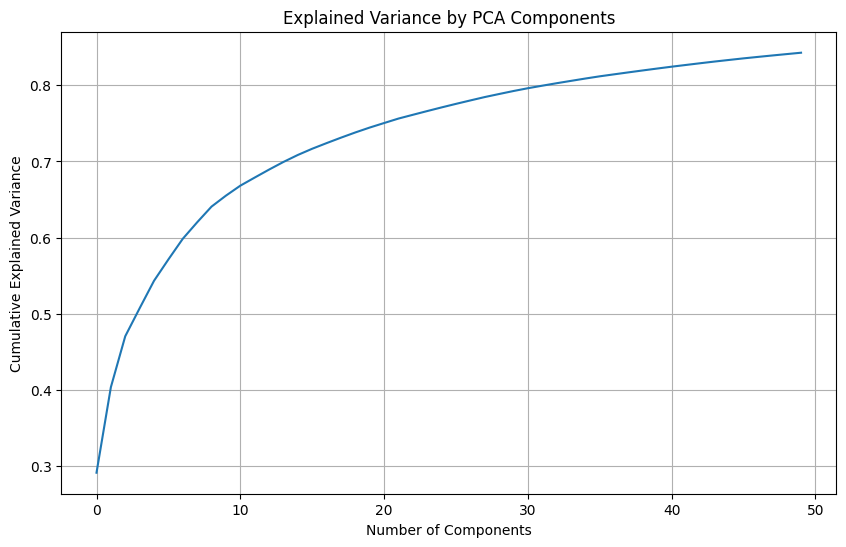

In [3]:
# Apply PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1000
           1       0.51      0.56      0.53      1000
           2       0.38      0.30      0.33      1000
           3       0.33      0.30      0.31      1000
           4       0.44      0.40      0.42      1000
           5       0.42      0.39      0.41      1000
           6       0.47      0.57      0.51      1000
           7       0.50      0.43      0.46      1000
           8       0.54      0.61      0.58      1000
           9       0.46      0.51      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



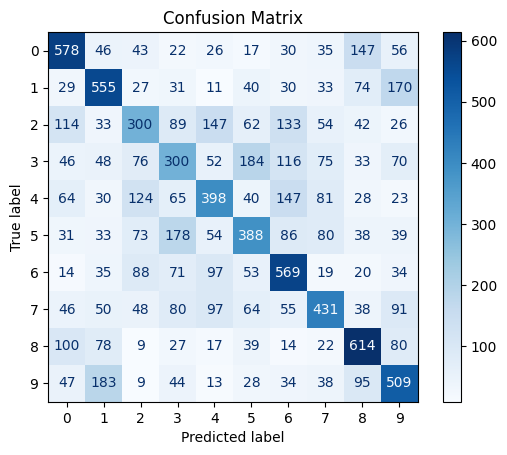

In [4]:
# Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_pca, y_train.ravel())

# Predict
y_pred = classifier.predict(X_test_pca)

# Evaluate
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[str(i) for i in range(10)])
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
